<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [3]:
import pandas as pd

Load the dataset into a dataframe.


In [4]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<AxesSubplot:xlabel='ConvertedComp'>

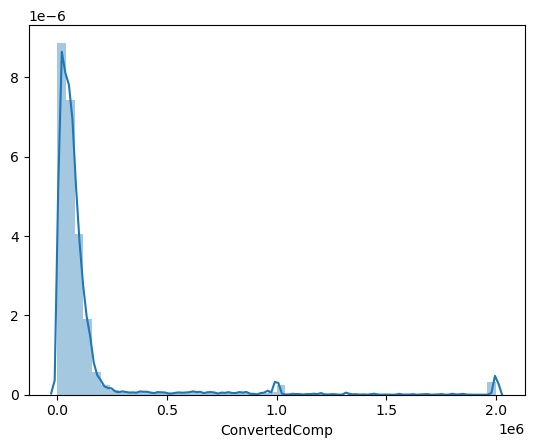

In [9]:
# your code goes here
import seaborn as sns
df[df['ConvertedComp'].isnull()]
df['ConvertedComp'] = pd.to_numeric(df['ConvertedComp'], errors='coerce')
df = df.dropna(subset=['ConvertedComp'])
df['ConvertedComp'] = df['ConvertedComp'].astype(int)
sns.distplot(df['ConvertedComp'], kde=True) 


Plot the histogram for the column `ConvertedComp`.


(array([9659.,  238.,  115.,  125.,   99.,  131.,   34.,   15.,   15.,
         151.]),
 array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.,
        1200000., 1400000., 1600000., 1800000., 2000000.]),
 <BarContainer object of 10 artists>)

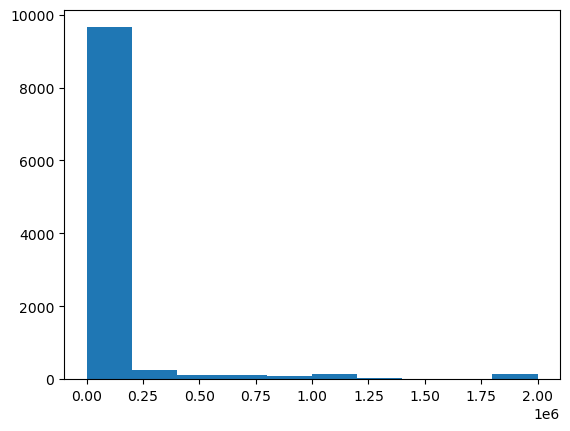

In [10]:
# your code goes here
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(df['ConvertedComp'])


What is the median of the column `ConvertedComp`?


In [52]:
# your code goes here
print( 'Median of ConvertedComp is:', df['ConvertedComp'].median())
print(df['Age'].median())

Median of ConvertedComp is: 57745.0
29.0


How many responders identified themselves only as a **Man**?


In [12]:
# your code goes here
df['Gender'].value_counts()

Man                                                            9725
Woman                                                           679
Non-binary, genderqueer, or gender non-conforming                59
Man;Non-binary, genderqueer, or gender non-conforming            26
Woman;Non-binary, genderqueer, or gender non-conforming          14
Woman;Man                                                         7
Woman;Man;Non-binary, genderqueer, or gender non-conforming       2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [17]:
# your code goes here
ConvertedComp_Woman=df[df['Gender']=='Woman']
ConvertedComp_Woman['ConvertedComp'].median()
                       

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [19]:
# your code goes here
df['Age'].describe()

count    10354.000000
mean        30.833040
std          7.389983
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


Text(0.5, 0, 'Age')

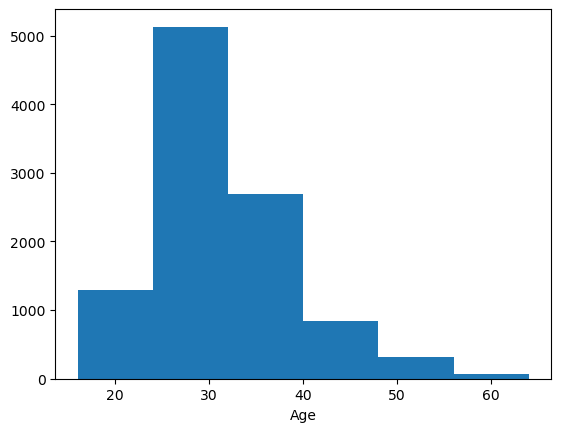

In [55]:
# your code goes here
plt.hist(df['Age'], bins =[16,24,32,40,48,56,64])
plt.xlabel('Age')

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


{'whiskers': [<matplotlib.lines.Line2D at 0x7f63d7b39450>,
 'caps': [<matplotlib.lines.Line2D at 0x7f63d7b0f150>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f63d7b39210>],
 'medians': [<matplotlib.lines.Line2D at 0x7f63d7b166d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f63d7b16a10>],
 'means': []}

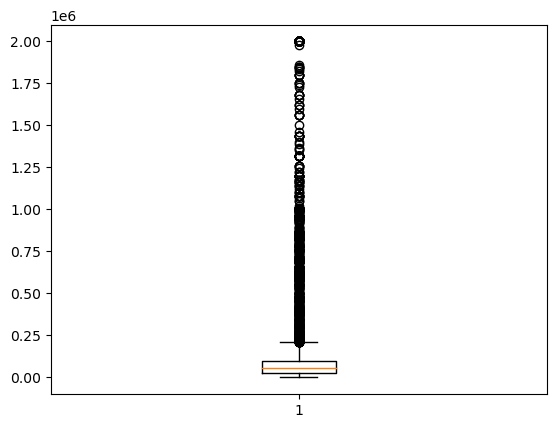

In [22]:
# your code goes here
plt.boxplot(df['ConvertedComp'])

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [24]:
# your code goes here
Q1= df['ConvertedComp'].quantile(0.25)
Q3= df['ConvertedComp'].quantile(0.75)
IQR = Q3 -Q1
print('The Inter Quartile Range is;', IQR)

The Inter Quartile Range is; 73132.0


Find out the upper and lower bounds.


In [41]:
# your code goes here
upper_bound=Q3+(IQR*1.5)
lower_bound=Q1-(IQR*1.5)
print('Lower Bound:', lower_bound)
print('Upper Bound:', upper_bound)

Lower Bound: -82830.0
Upper Bound: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [45]:
# your code goes here

outliers = df['ConvertedComp'][(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp']> upper_bound)]
print(outliers)

3         455352
13       1100000
45        229016
46       2000000
60       1000000
          ...   
11296     840000
11303    1000000
11350     300000
11353     260000
11369     701196
Name: ConvertedComp, Length: 879, dtype: int64


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [58]:
# your code goes here
df_removed = df[df.ConvertedComp <= upper_bound]
df_removed.ConvertedComp.describe()

count      9703.000000
mean      59883.208389
std       43394.336755
min           0.000000
25%       24060.000000
50%       52704.000000
75%       85574.500000
max      209356.000000
Name: ConvertedComp, dtype: float64

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [57]:
# your code goes here
df.corr()['Age']

Respondent       0.002394
CompTotal        0.006949
ConvertedComp    0.105386
WorkWeekHrs      0.031592
CodeRevHrs      -0.015742
Age              1.000000
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
